# Code {ordinary least square}

### Formulas 

variance : $ S^2 = \frac {\sum_{i=1}^n (x_i - \bar{x})}{n} $

std dev. : $ S = \sqrt {\frac {\sum_{i=1}^n (x_i - \bar{x})}{n}} $

X Stats: Mean =  22.904761904761905  variance =  545.3133640552996
Y Stats: Mean =  98.18730158730159  variance =  7626.101449052737
Covariance =  1861.60360983103


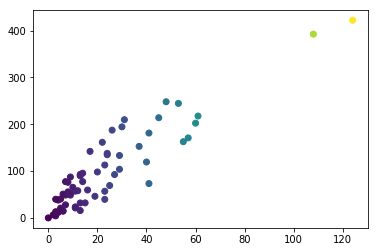

Intercept:  19.994485759114795 Slope:  3.4138235600663673


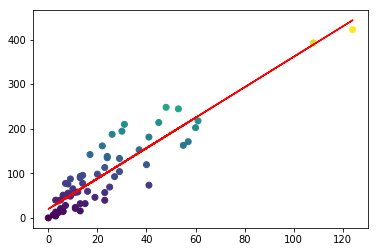

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./data/AutoInsurSweden.csv')

print('X Stats: Mean = ',data.X.mean(), ' variance = ',data.X.var())
print('Y Stats: Mean = ',data.Y.mean(), ' variance = ',data.Y.var())
print('Covariance = ',np.cov(data.X,data.Y)[0,1])

plt.scatter(data.X,data.Y, c=data.X)
plt.show()

m = np.cov(data.X,data.Y)[0,1] / data.X.var()
c = data.Y.mean() - m * data.X.mean()

print('Intercept: ',c,'Slope: ', m)

y = c + m*data.X # Model Equation

plt.scatter(data.X,data.Y, c=data.Y)
plt.plot(data.X,y,c='red')
plt.show()

# Code {gradient descent}

__Loss Function__

The loss is the error in our predicted value of m and c. Our goal is to minimize this error to obtain the most accurate value of m and c.
We will use the Mean Squared Error function to calculate the loss. There are three steps in this function:

1. Find the difference between the actual y and predicted y value(y = mx + c), for a given x.
2. Square this difference.
3. Find the mean of the squares for every value in X.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

Here yᵢ is the actual value and ȳᵢ is the predicted value. Lets substitute the value of ȳᵢ:

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - (mx_i+c))^2 $$

So we square the error and find the mean. hence the name Mean Squared Error. Now that we have defined the loss function, lets get into the interesting part — minimizing it and finding m and c.


Let’s try applying gradient descent to m and c and approach it step by step:

1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.

2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.

$$ D_m = \frac{1}{n} \sum_{i=0}^n 2(y_i - (mx_i+c))(-x_i) $$

$$ D_m = \frac{-2}{n} \sum_{i=0}^n x_i(y_i - \bar{y_i}) $$

    - Dₘ is the value of the partial derivative with respect to m. Similarly lets find the partial derivative with respect to c, Dc :

$$ D_c = \frac{-2}{n} \sum_{i=0}^n (y_i - \bar{y_i}) $$


3. Now we update the current value of m and c using the following equation:

$$ m= m-l*D_m $$
$$ c= c-l*D_c $$

4. We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.

In [ ]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

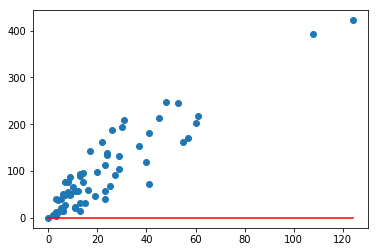

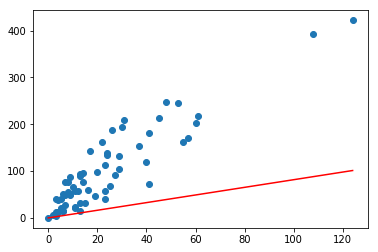

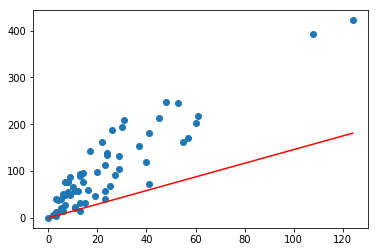

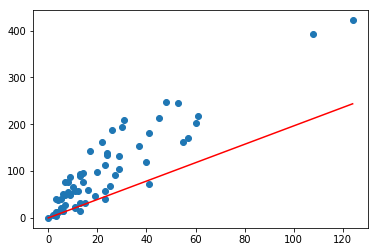

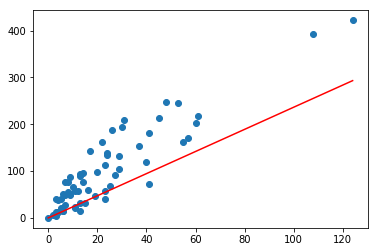

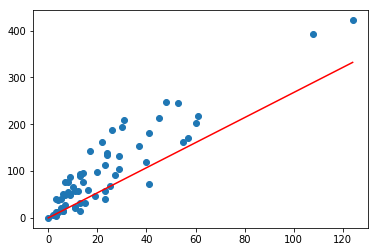

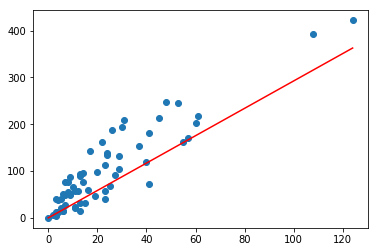

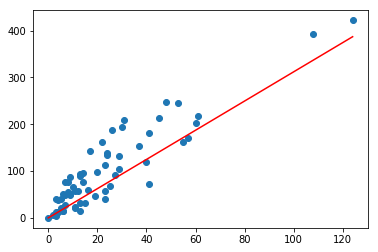

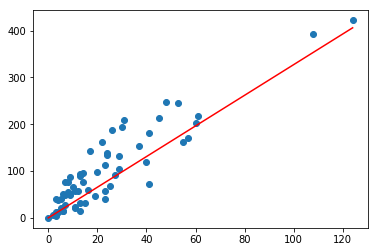

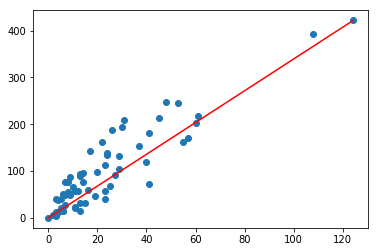

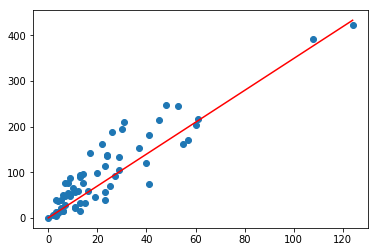

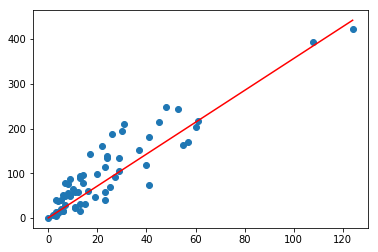

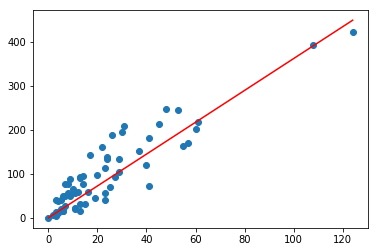

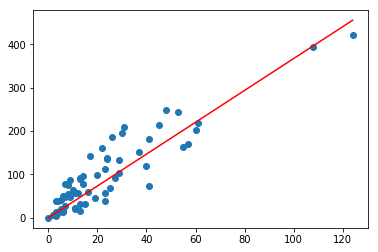

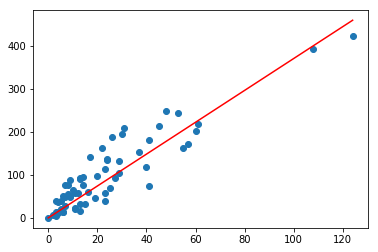

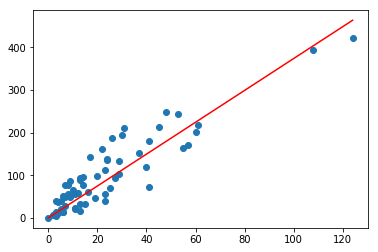

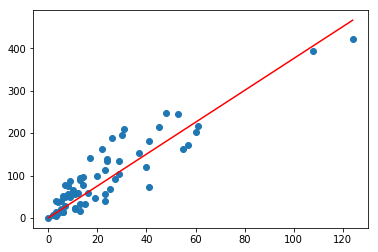

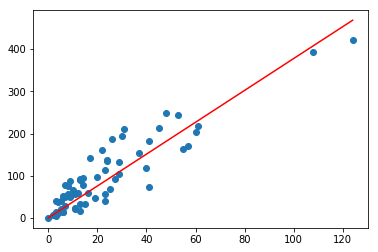

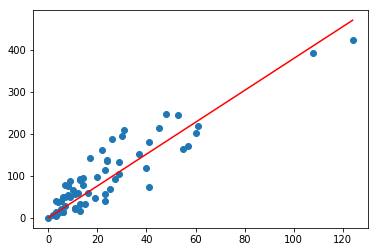

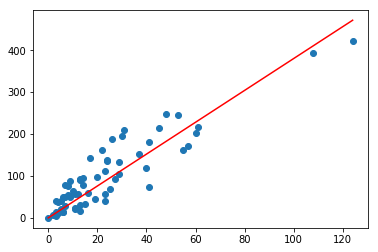

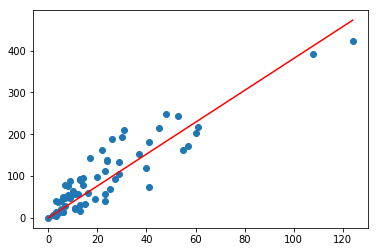

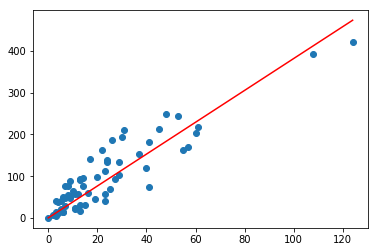

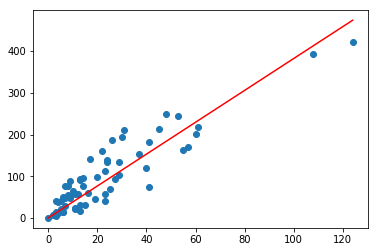

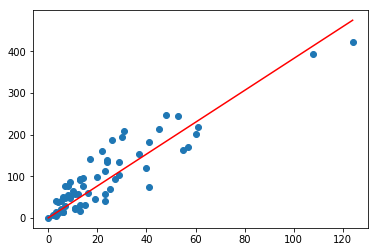

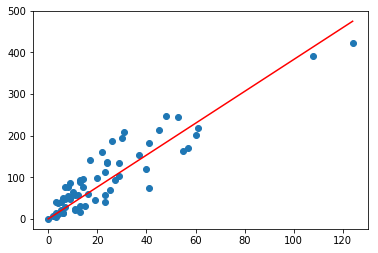

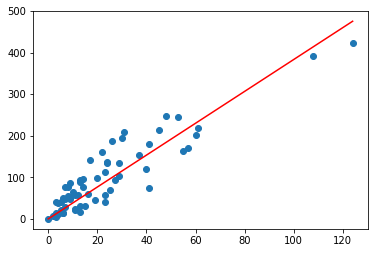

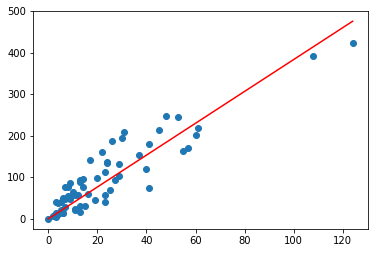

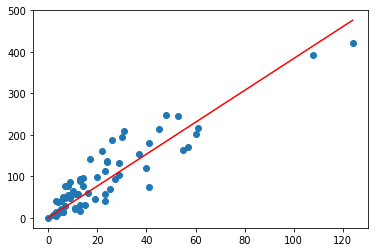

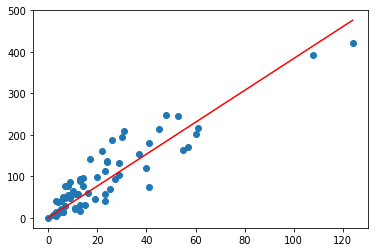

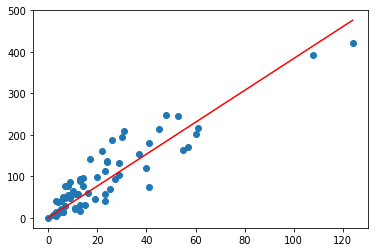

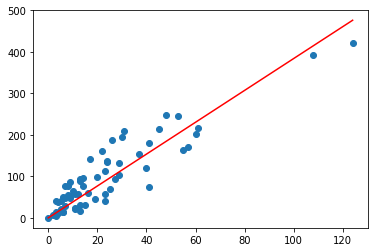

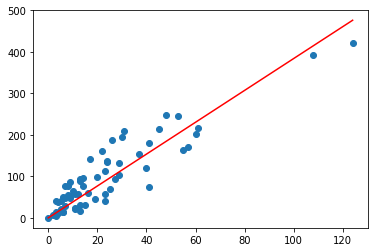

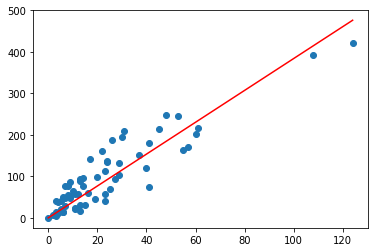

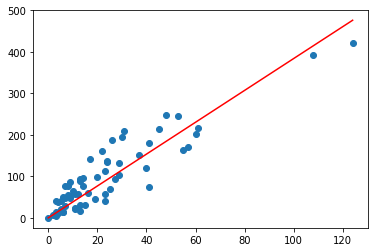

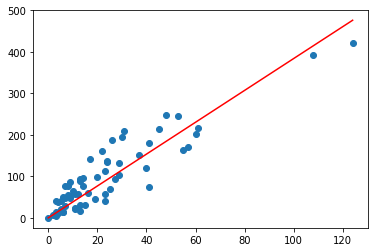

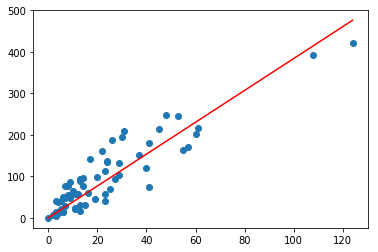

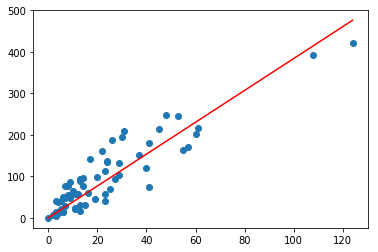

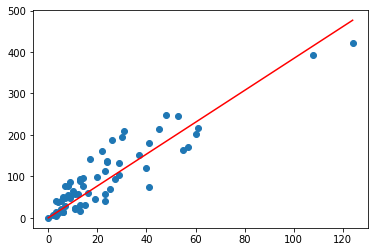

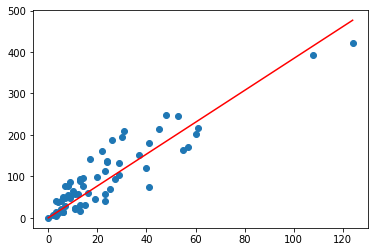

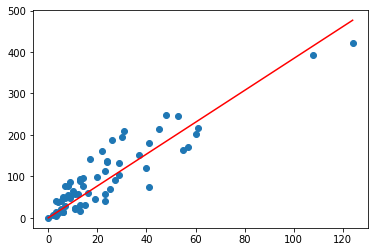

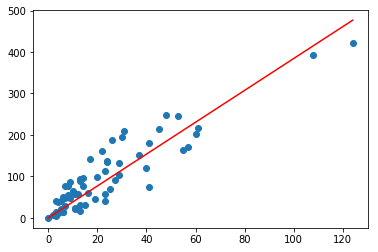

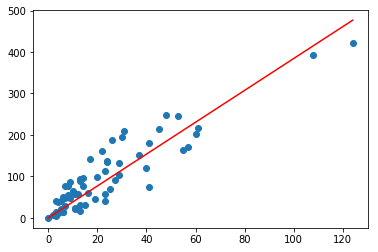

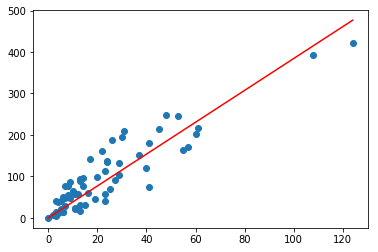

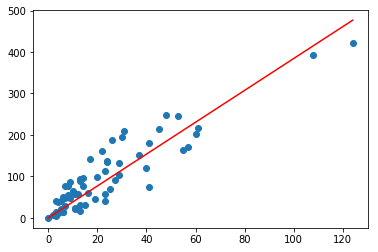

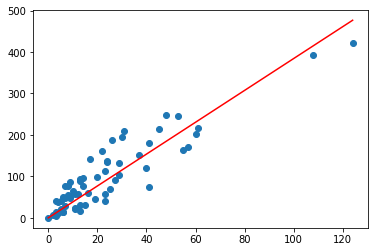

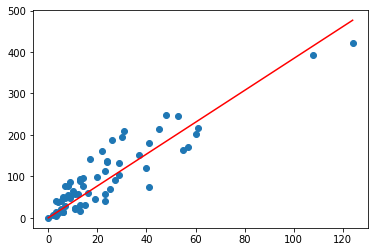

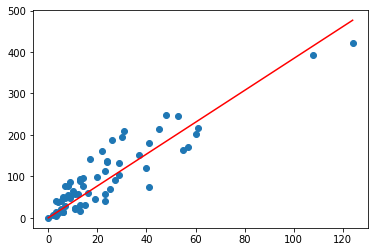

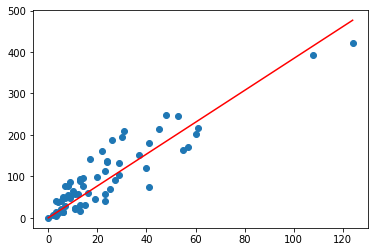

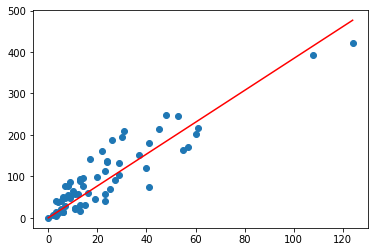

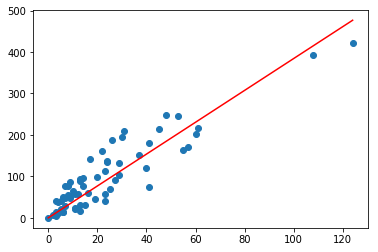

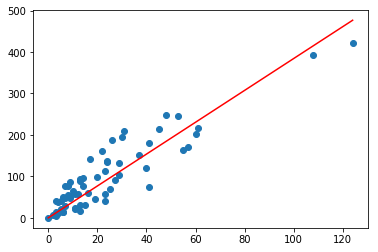

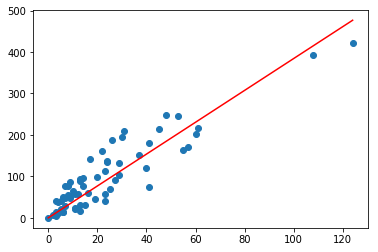

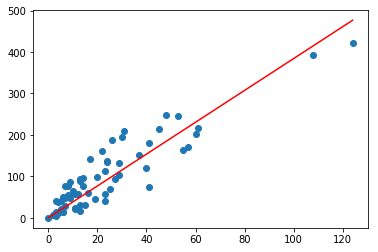

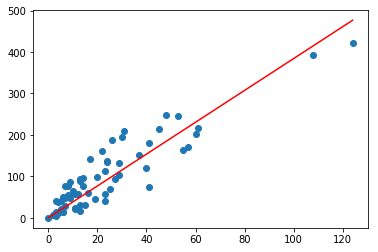

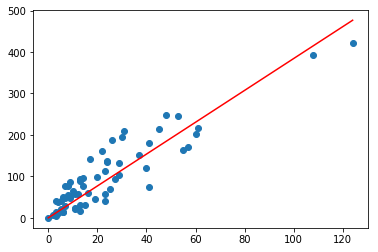

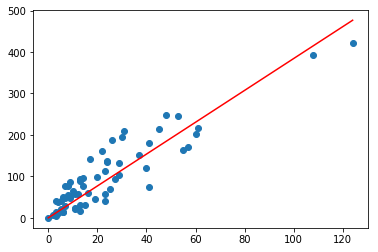

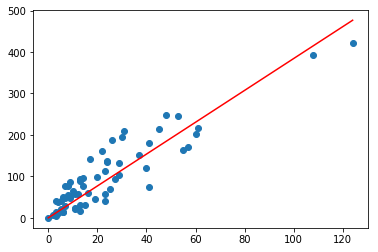

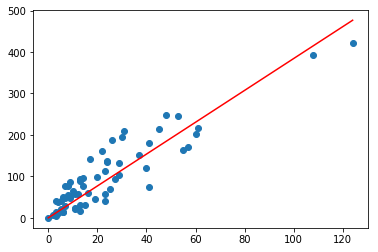

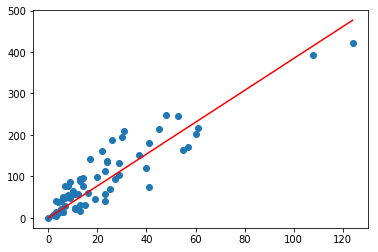

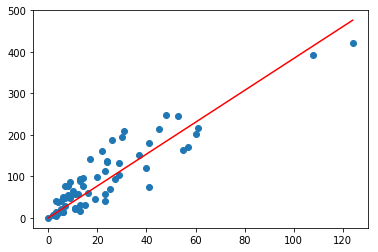

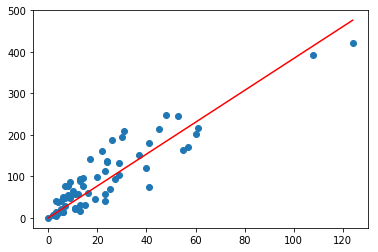

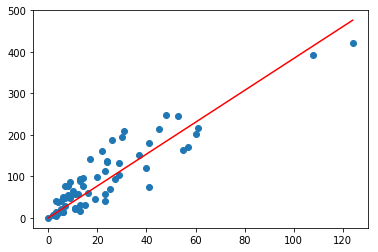

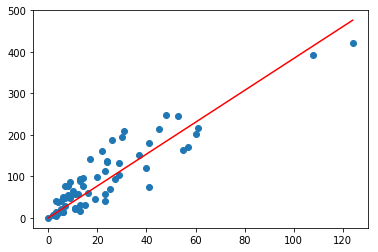

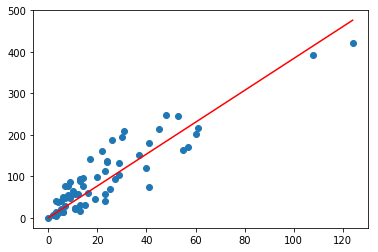

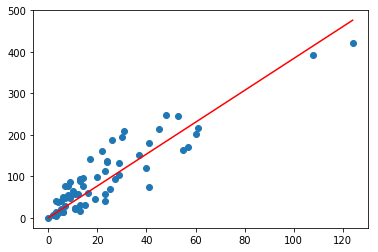

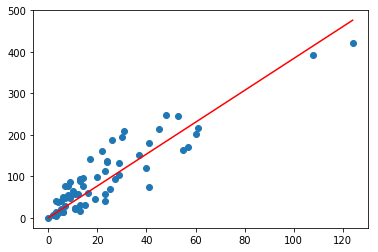

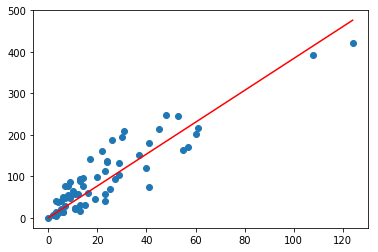

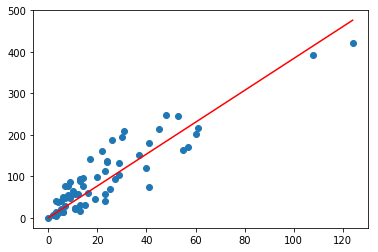

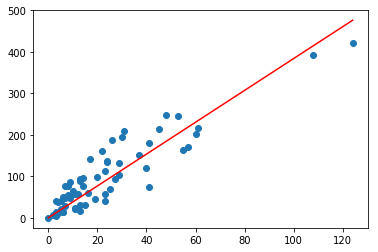

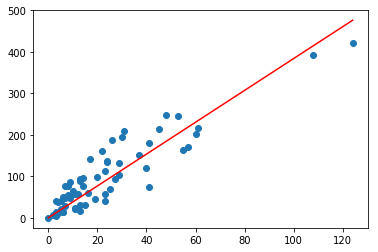

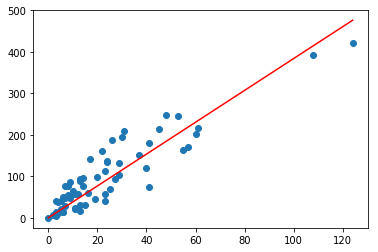

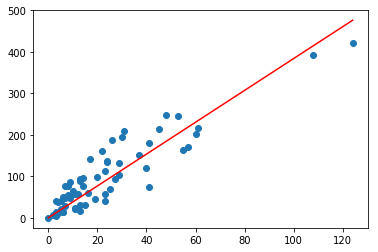

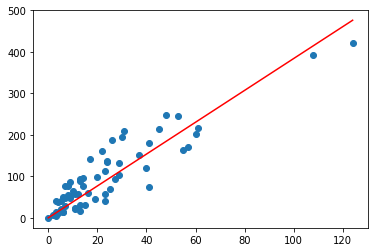

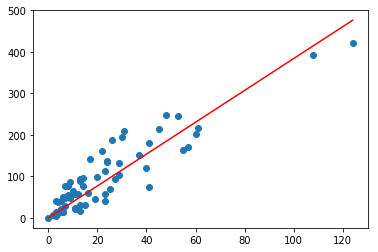

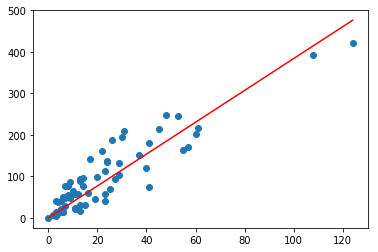

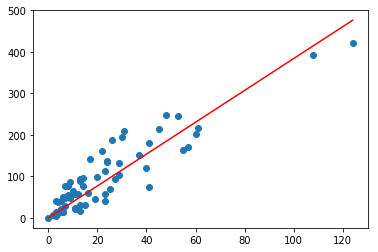

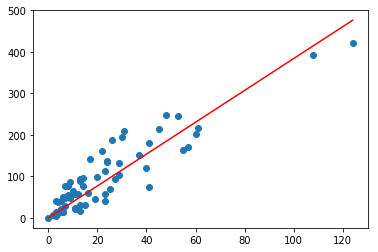

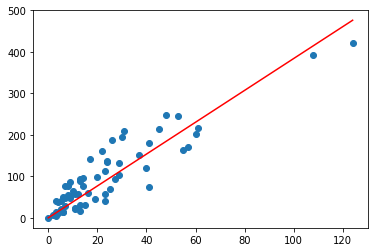

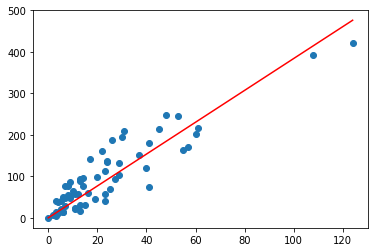

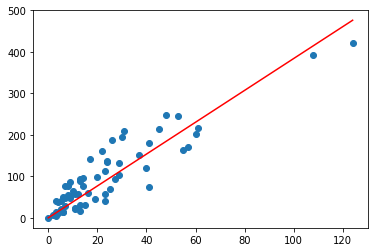

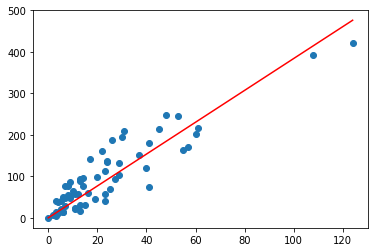

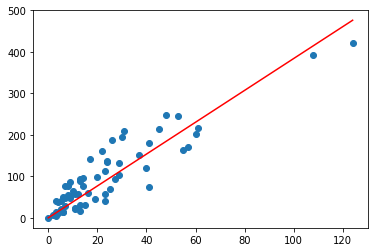

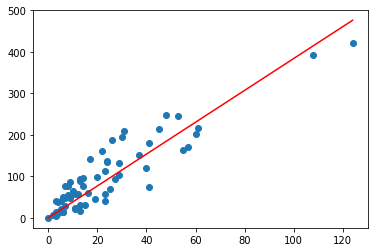

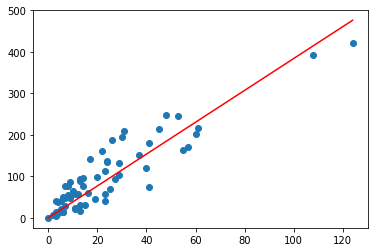

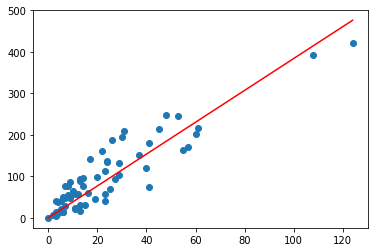

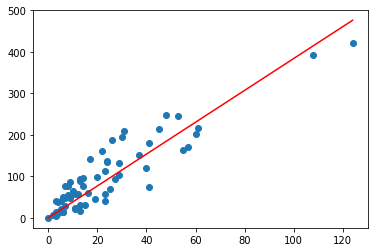

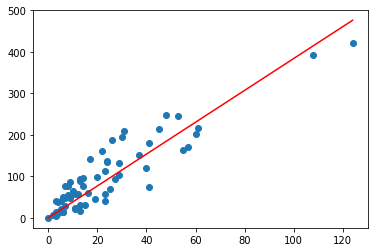

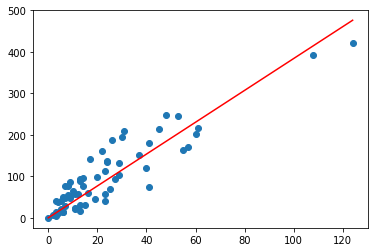

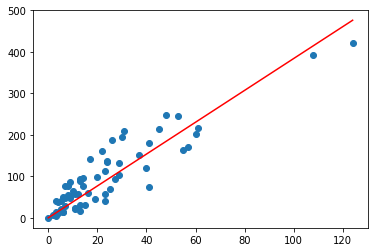

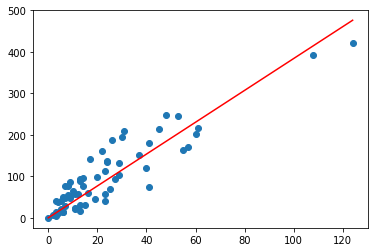

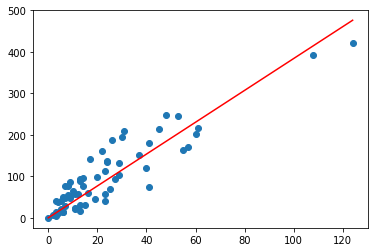

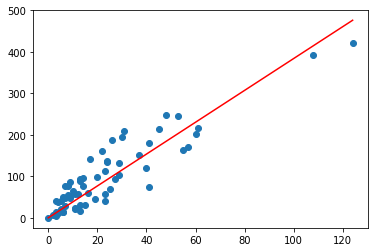

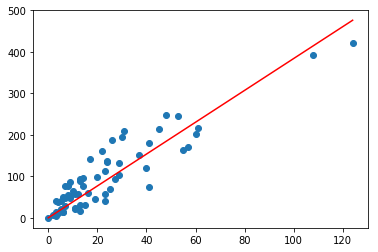

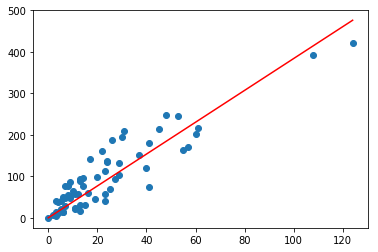

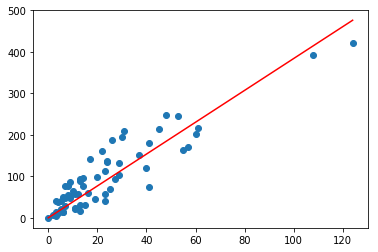

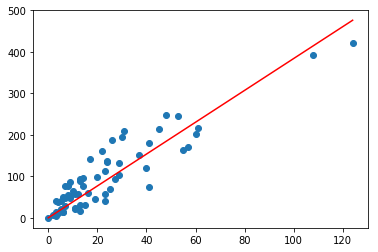

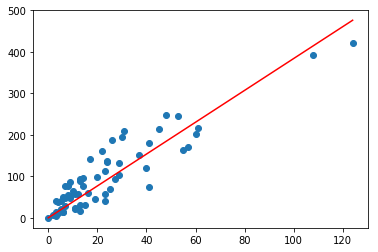

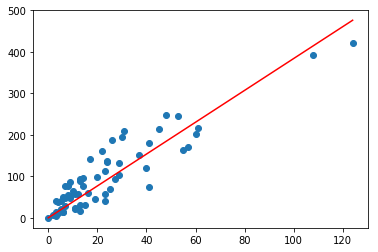

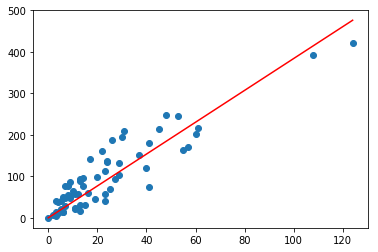

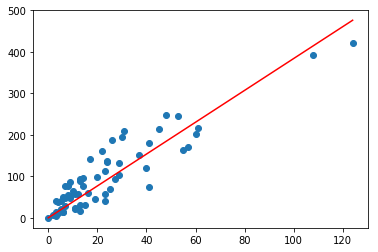

3.8394354507293165 0.28327009014941695


In [4]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n = float(len(data.X)) # Number of elements in X

# Performing Gradient Descent 

for i in range(epochs): 
    Y_pred = m*data.X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(data.X * (data.Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(data.Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
    plt.scatter(data.X, data.Y) 
    plt.plot([min(data.X), max(data.X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
    plt.show()
    
print (m, c)

In [ ]:
# Making predictions
Y_pred = m*data.X + c

plt.scatter(data.X, data.Y) 
plt.plot([min(data.X), max(data.X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

def plot_for_offset(power, y_max):
    # Data for plotting
    t = np.arange(0.0, 100, 1)
    s = t**power

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(t, s)
    ax.grid()
    ax.set(xlabel='X', ylabel='x^{}'.format(power),
           title='Powers of x')

    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    ax.set_ylim(0, y_max)

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':2.0, 'quantizer':'nq'}
imageio.mimsave('./powers.gif', [plot_for_offset(i/4, 100) for i in range(10)], fps=1)

# Code {tensorflow}

given some data points of x and corresponding y and we need to learn the relationship between them that is called a hypothesis.

In case of Linear regression, the hypothesis is a straight line, i.e,

$$ h(x) = wx+b$$ 

Where w is a vector called Weights and b is a scalar called Bias. The Weights and Bias are called the parameters of the model.

All we need to do is estimate the value of w and b from the given set of data such that the resultant hypothesis produces the least cost J which is defined by the following cost function.

$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^m (y_i - h(x_i))^2 $$

where m is the number of data points in the given dataset. This cost function is also called Mean Squared Error.

For finding the optimized value of the parameters for which J is minimum, we will be using a commonly used optimizer algorithm called Gradient Descent. Following is the pseudo-code for Gradient Descent:

`Repeat untill Convergence {
    w = w - α * δJ/δw
    b = b - α * δJ/δb
}`

where α is a hyperparameter called the Learning Rate.



In [ ]:
#import numpy as np 
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt 

data = pd.read_csv('./data/AutoInsurSweden.csv')

X = tf.placeholder('float')
Y = tf.placeholder('float')

W = tf.variable(np.random.randn(),name ='W')
b = tf.variable(np.random.randn(),name ='b')

learning_rate = 0.001
training_epochs = 500

y_pred = tf.add(tf.multiply(X,w),b)
cost = tf.reduce_sum(tf.pow(y_pred - Y,2))/(2*n)
optimizer = tf.train.GradientDescentOptimizer(lerning_rate).minimize(cost)

init = tf.global_variable_initializer()

with tf.session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for(_x,_y) in zip(data.X,data.Y):
            sess.run(optimizer, feed_dict = {X:_x,Y:_y})
            
        if(epoch+1)%50 == 0:
            c = sess.run(cost, feed_dict={X:data.X,Y:data.Y})
            print('Epoch', (epoch+1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
        
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

SystemError: <class '_frozen_importlib._ModuleLockManager'> returned a result with an error set

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import